In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)


df['job_skills'] = df['job_skills'].apply(clean_li)

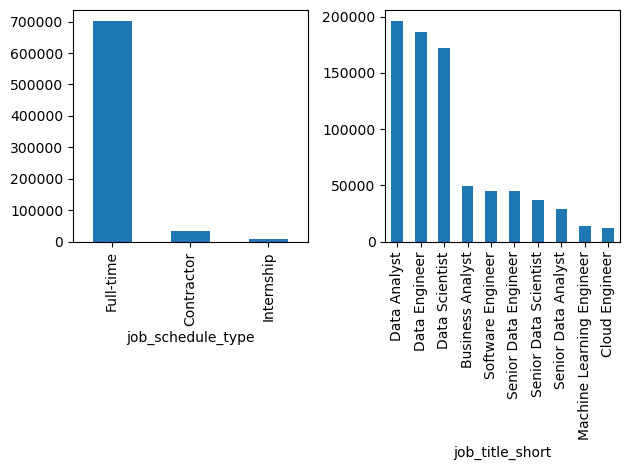

In [5]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[0])

fig.tight_layout()


In [6]:
df_exploded =df.copy()
df_exploded = df.explode('job_skills')
# df_exploded['job_skills'].value_counts().head(10).plot(kind='bar') 
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()
df_skill_count =skill_count.reset_index(name = 'skill_count')
df_skill_count =df_skill_count.sort_values(by='skill_count',ascending=False)
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [7]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

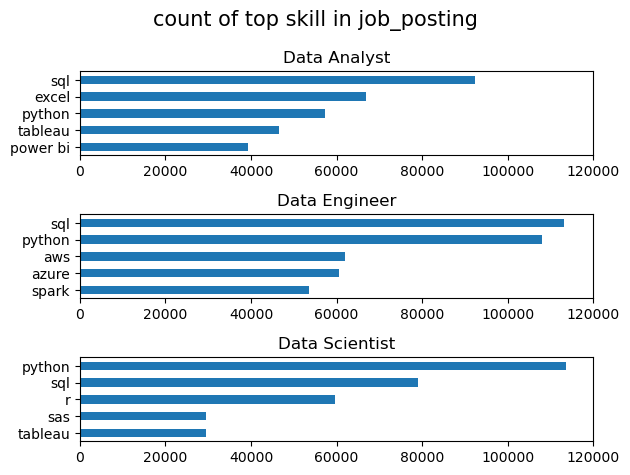

In [19]:
fig ,ax = plt.subplots(3, 1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skill_count[df_skill_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title) 
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

    fig.suptitle('count of top skill in job_posting',fontsize=15)
    fig.tight_layout()

